# Heart Disease Prediction

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

dataframe = pd.read_csv("heart.csv")

In [17]:
display(dataframe.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

In [18]:
display(dataframe.describe(include='all'))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
display(dataframe.isnull().sum())

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Exploratory Data Analysis

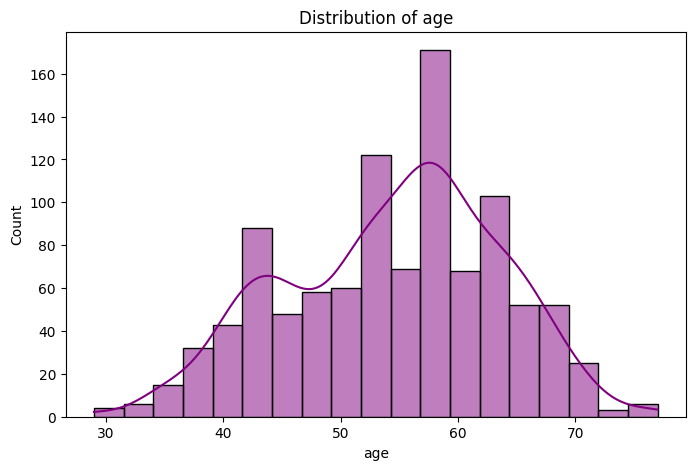

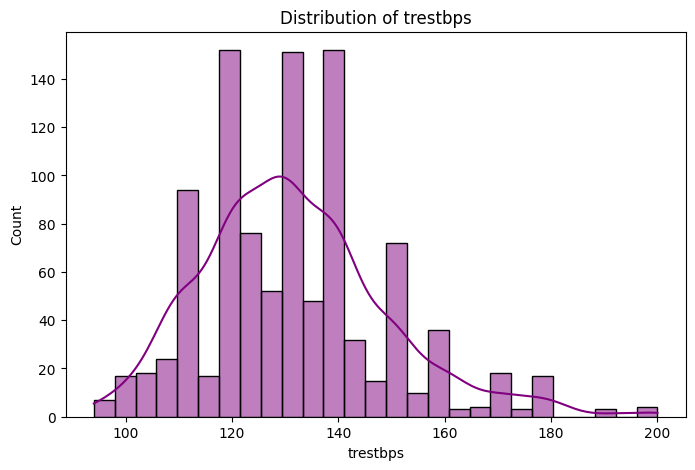

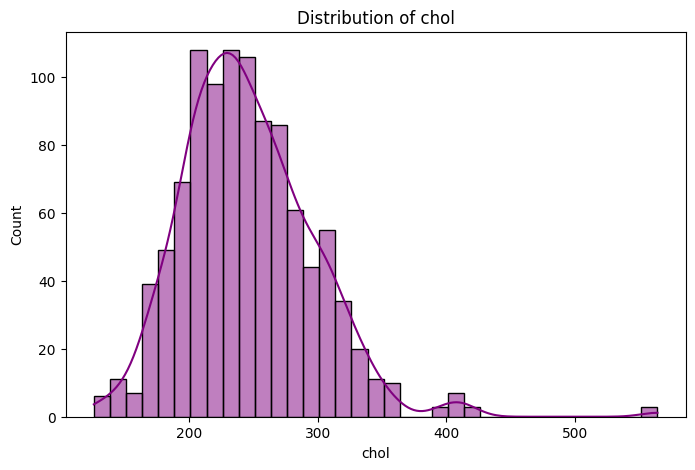

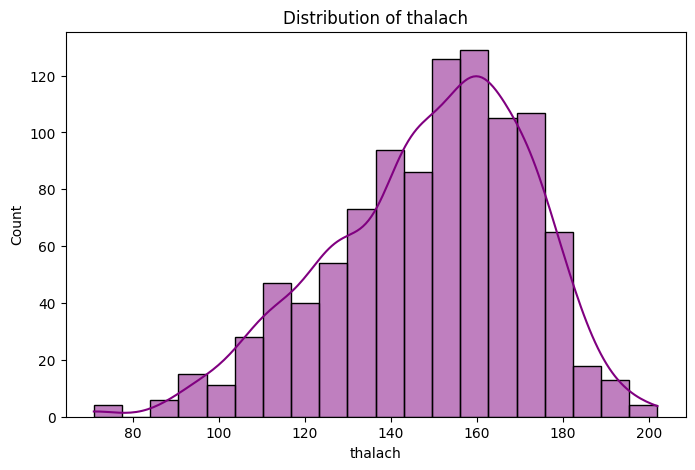

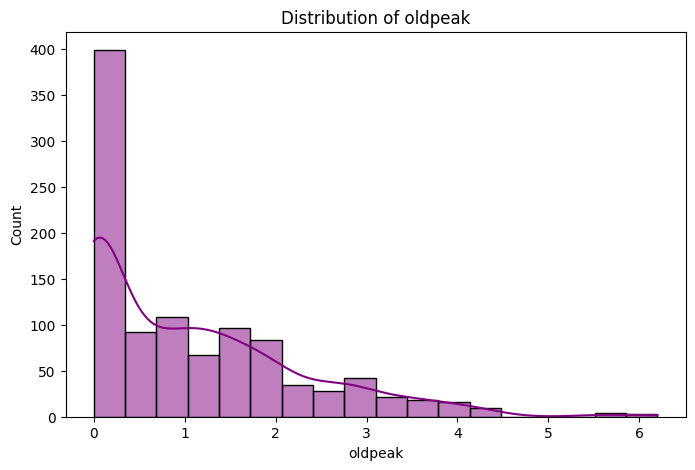

In [20]:
numerical_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_col:
    plt.figure(figsize=(8,5))
    sns.histplot(dataframe[col], color="purple", kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

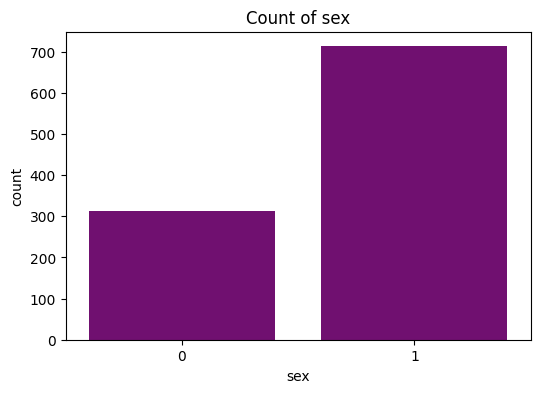

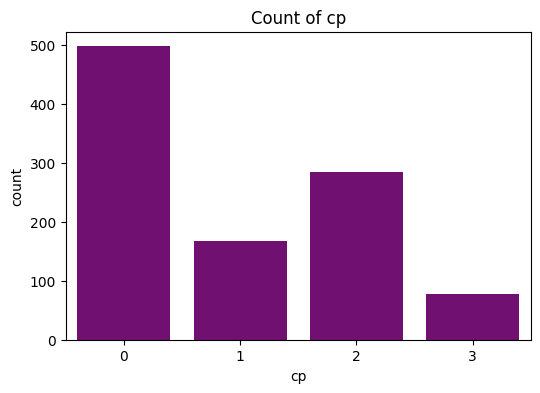

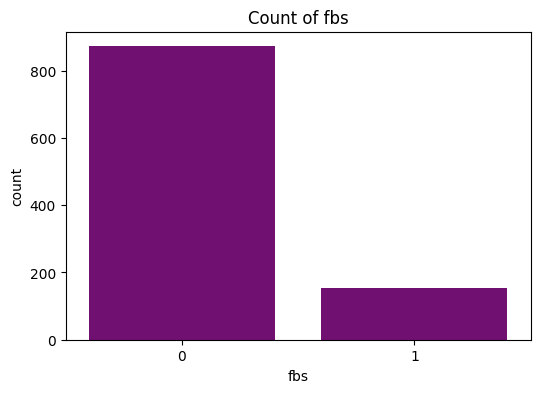

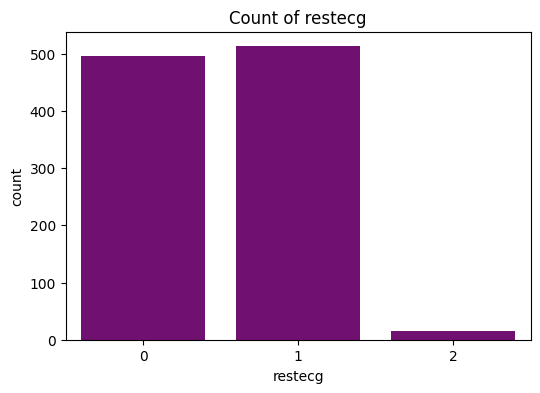

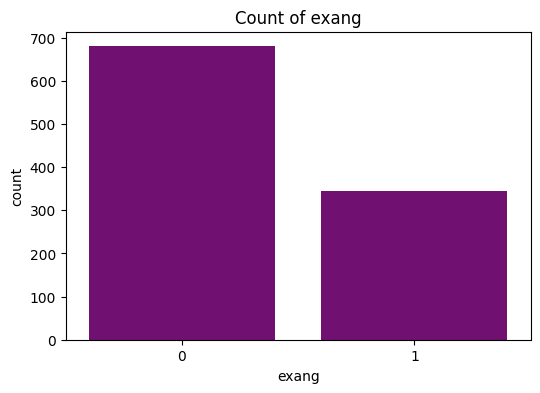

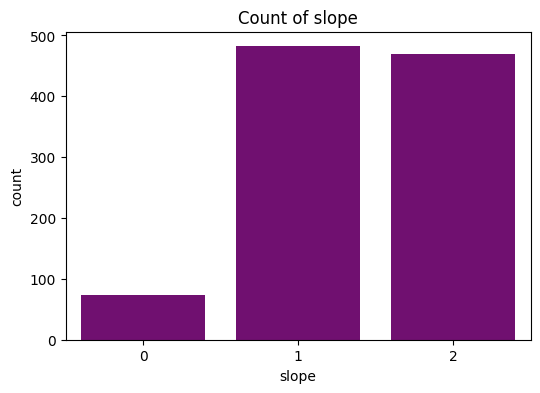

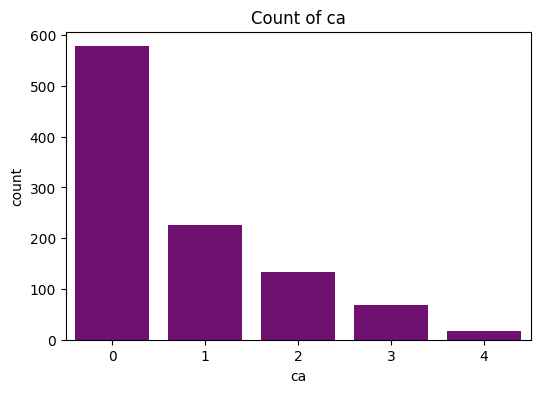

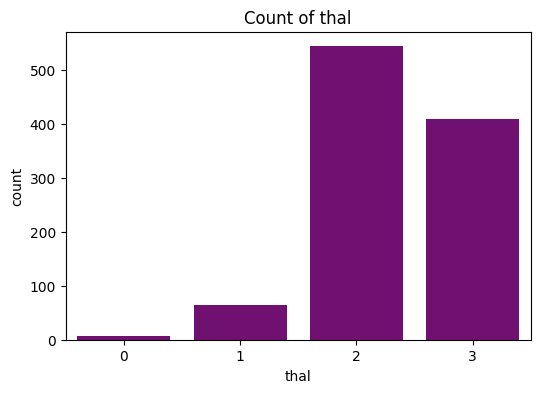

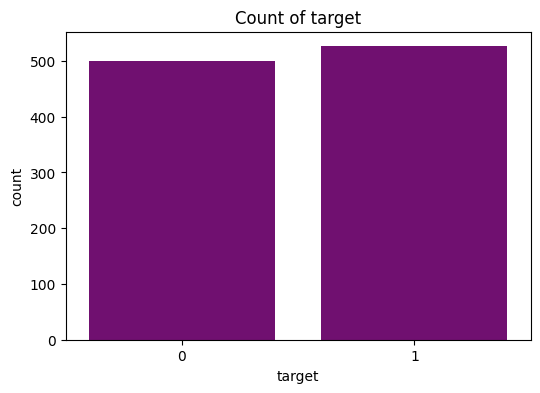

In [21]:
categorical_col = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for col in categorical_col:
    plt.figure(figsize=(6,4))
    sns.countplot(x=dataframe[col], color="purple")
    plt.title(f"Count of {col}")
    plt.show()

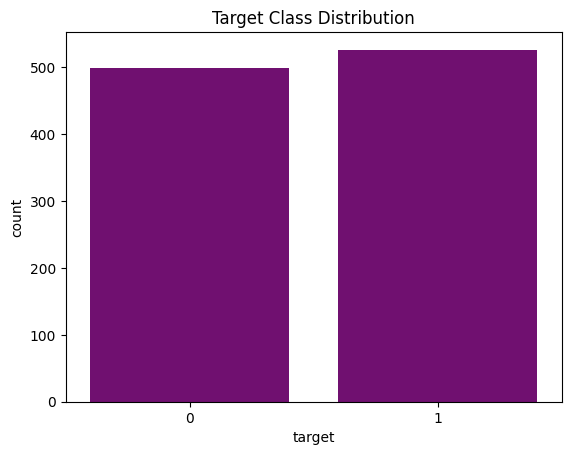

In [22]:
sns.countplot(x=dataframe['target'], color="purple")
plt.title("Target Class Distribution")
plt.show()

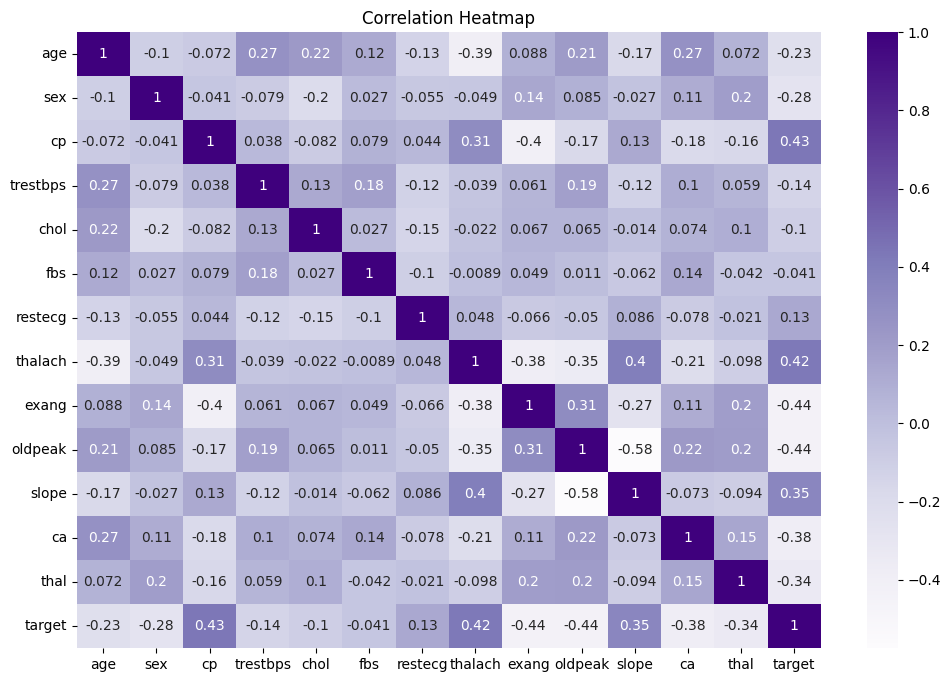

In [23]:
plt.figure(figsize=(12,8))
sns.heatmap(dataframe.corr(), annot=True, cmap="Purples")
plt.title("Correlation Heatmap")
plt.show()

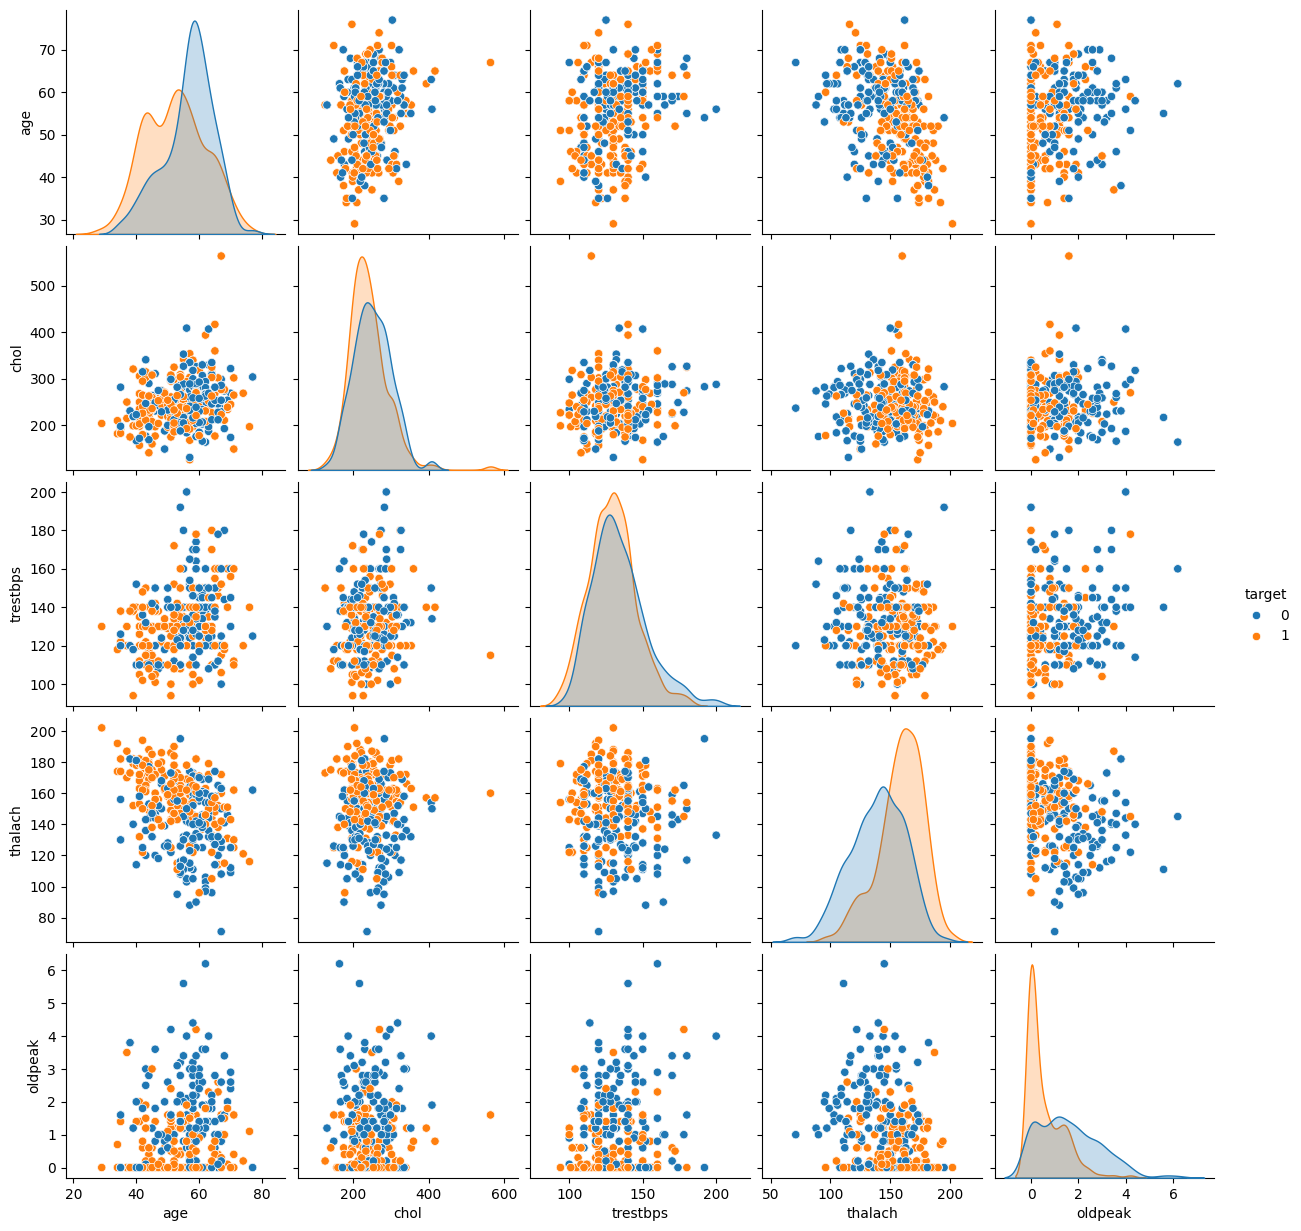

In [24]:
sns.pairplot(dataframe[['age','chol','trestbps','thalach','oldpeak','target']], hue='target')
plt.show()

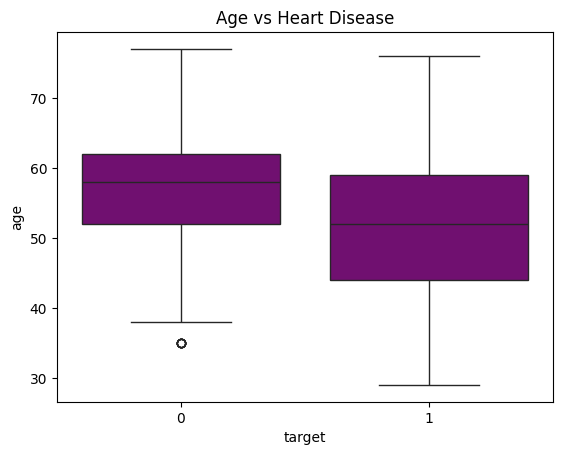

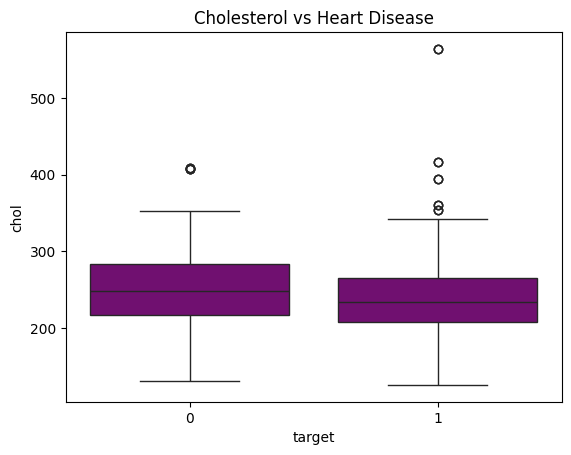

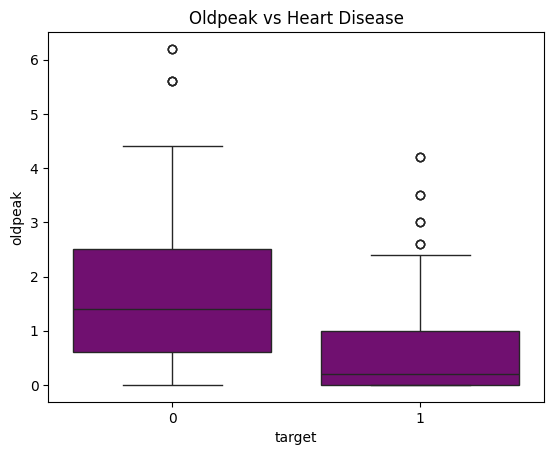

In [25]:
sns.boxplot(x='target', y='age', data=dataframe, color="purple")
plt.title("Age vs Heart Disease")
plt.show()

sns.boxplot(x='target', y='chol', data=dataframe, color="purple")
plt.title("Cholesterol vs Heart Disease")
plt.show()

sns.boxplot(x='target', y='oldpeak', data=dataframe, color="purple")
plt.title("Oldpeak vs Heart Disease")
plt.show()

Preprocessing

In [26]:
X = dataframe.drop(columns=['target'])
y = dataframe['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression

In [32]:
log_reg = LogisticRegression(max_iter=2000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
print("Logistic Regression Results:")
print("Accuracy:", np.round(accuracy_score(y_test, y_pred_log),3))
print("Precision:", np.round(precision_score(y_test, y_pred_log),3))
print("Recall:", np.round(recall_score(y_test, y_pred_log),3))
print("F1 Score:", np.round(f1_score(y_test, y_pred_log),3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Logistic Regression Results:
Accuracy: 0.795
Precision: 0.756
Recall: 0.874
F1 Score: 0.811

Confusion Matrix:
[[73 29]
 [13 90]]


K-Nearest Neighbors

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Results:")
print("Accuracy:", np.round(accuracy_score(y_test, y_pred_knn),3))
print("Precision:", np.round(precision_score(y_test, y_pred_knn),3))
print("Recall:", np.round(recall_score(y_test, y_pred_knn),3))
print("F1 Score:", np.round(f1_score(y_test, y_pred_knn),3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Results:
Accuracy: 0.834
Precision: 0.8
Recall: 0.893
F1 Score: 0.844

Confusion Matrix:
[[79 23]
 [11 92]]


Support Vector Classifier

In [34]:
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
print("SVC Results:")
print("Accuracy:", np.round(accuracy_score(y_test, y_pred_svc),3))
print("Precision:", np.round(precision_score(y_test, y_pred_svc),3))
print("Recall:", np.round(recall_score(y_test, y_pred_svc),3))
print("F1 Score:", np.round(f1_score(y_test, y_pred_svc),3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svc))

SVC Results:
Accuracy: 0.888
Precision: 0.851
Recall: 0.942
F1 Score: 0.894

Confusion Matrix:
[[85 17]
 [ 6 97]]


Decision Tree Classifier

In [35]:
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)
y_pred_decisiontree = decisiontree.predict(X_test)
print("Decision Tree Results:")
print("Accuracy:", np.round(accuracy_score(y_test, y_pred_decisiontree),3))
print("Precision:", np.round(precision_score(y_test, y_pred_decisiontree),3))
print("Recall:", np.round(recall_score(y_test, y_pred_decisiontree),3))
print("F1 Score:", np.round(f1_score(y_test, y_pred_decisiontree),3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_decisiontree))

Decision Tree Results:
Accuracy: 0.985
Precision: 1.0
Recall: 0.971
F1 Score: 0.985

Confusion Matrix:
[[102   0]
 [  3 100]]


Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(random_state=42)
randomforest.fit(X_train, y_train)
y_pred_randomforest = randomforest.predict(X_test)
print("Random Forest Results:")
print("Accuracy:", np.round(accuracy_score(y_test, y_pred_randomforest),3))
print("Precision:", np.round(precision_score(y_test, y_pred_randomforest),3))
print("Recall:", np.round(recall_score(y_test, y_pred_randomforest),3))
print("F1 Score:", np.round(f1_score(y_test, y_pred_randomforest),3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_randomforest))

Random Forest Results:
Accuracy: 0.985
Precision: 1.0
Recall: 0.971
F1 Score: 0.985

Confusion Matrix:
[[102   0]
 [  3 100]]


Naive Bayes Classifier

In [39]:
naivebayes = GaussianNB()
naivebayes.fit(X_train_scaled, y_train)
y_pred_naivebayes = naivebayes.predict(X_test_scaled)
print("Naive Bayes Results:")
print("Accuracy:", np.round(accuracy_score(y_test, y_pred_naivebayes),3))
print("Precision:", np.round(precision_score(y_test, y_pred_naivebayes),3))
print("Recall:", np.round(recall_score(y_test, y_pred_naivebayes),3))
print("F1 Score:", np.round(f1_score(y_test, y_pred_naivebayes),3))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_naivebayes))

Naive Bayes Results:
Accuracy: 0.8
Precision: 0.754
Recall: 0.893
F1 Score: 0.818

Confusion Matrix:
[[72 30]
 [11 92]]


Finalisation

In [40]:
results = {
    "Model": ["Logistic Regression", "KNN", "SVC", "Decision Tree", "Random Forest", "Naive Bayes"],
    "Accuracy": [0.795, 0.834, 0.888, 0.985, 0.985, 0.800],
    "Precision": [0.756, 0.800, 0.851, 1.0, 1.0, 0.754],
    "Recall": [0.874, 0.893, 0.942, 0.971, 0.971, 0.893],
    "F1 Score": [0.811, 0.844, 0.894, 0.985, 0.985, 0.818],
}

results_dataframe = pd.DataFrame(results)
display(results_dataframe)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.795,0.756,0.874,0.811
1,KNN,0.834,0.800,0.893,0.844
2,SVC,0.888,0.851,0.942,0.894
3,Decision Tree,0.985,1.000,0.971,0.985
4,Random Forest,0.985,1.000,0.971,0.985
5,Naive Bayes,0.800,0.754,0.893,0.818
